# Breast Cancer Wisconsin (Diagnostic) Data Set
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

## 데이터 전처리

### 데이터 로드

In [130]:
import numpy as np
import pandas as pd

df_origin = pd.read_csv('./data/data.csv')
data = df_origin.copy()

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 데이터 기본 확인

In [131]:
data.shape

(569, 33)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [133]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


- 569행

- 30개 특성 + id + diagnosis(target) + 불필요 컬럼 1개(Unnamed: 32)

- 결측치 없음

### 불필요 컬럼 제거

In [134]:
data = data.drop('Unnamed: 32', axis=1)

In [135]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### target 분리

In [136]:
target = data.pop('diagnosis')
target.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [137]:
target = target.map({'B': 0, 'M': 1})
target

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

- B (Benign) → 0
- M (Malignant) → 1

In [138]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42, stratify=target
)

print(train_input.shape, test_input.shape)

(455, 31) (114, 31)


## 탐색적 데이터 분석(EDA)

### Target 분포 시각화

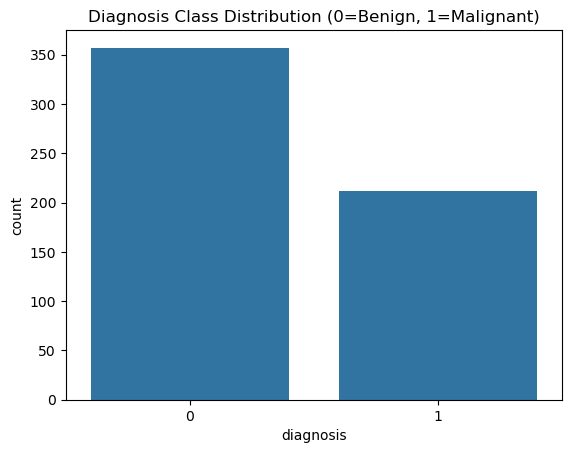

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=target)
plt.title("Diagnosis Class Distribution (0=Benign, 1=Malignant)")
plt.show()

- Benign 클래스가 더 많음

- Accuracy 단독 평가는 부적절 → Recall, ROC-AUC 필요

### 특성 스케일 분포 확인

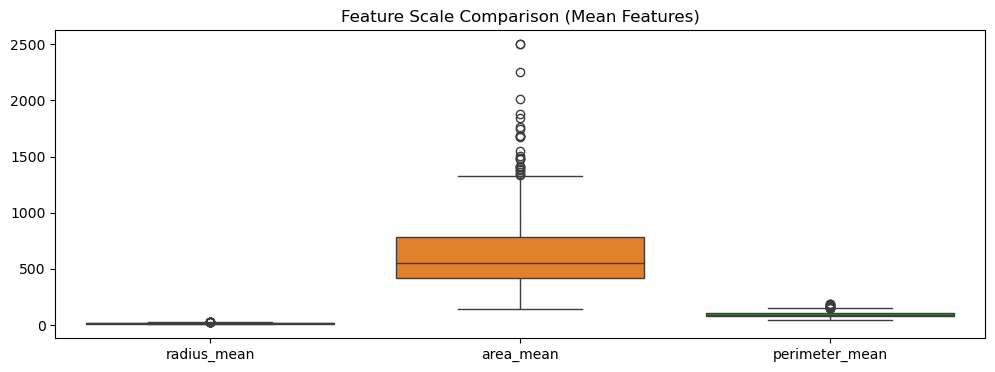

In [140]:
plt.figure(figsize=(12,4))
sns.boxplot(data=data[['radius_mean','area_mean','perimeter_mean']])
plt.title("Feature Scale Comparison (Mean Features)")
plt.show()

- feature 간 스케일 차이 매우 큼

- 거리 기반 모델 사용 시 StandardScaler 필수

### Target별 Feature 분포 비교

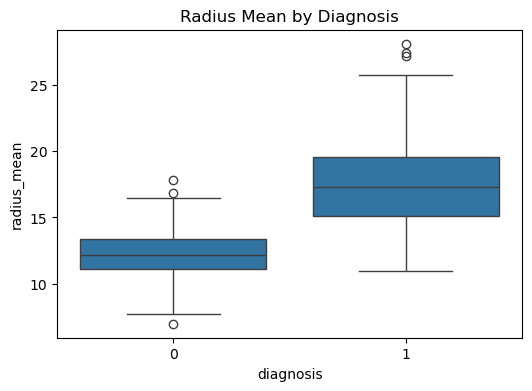

In [141]:
plt.figure(figsize=(6,4))
sns.boxplot(x=target, y=data['radius_mean'])
plt.title("Radius Mean by Diagnosis")
plt.show()

- 악성(M) 그룹에서 radius_mean 값이 전반적으로 큼

- 일부 feature는 단독으로도 분리력 존재

### Feature 상관관계 분석

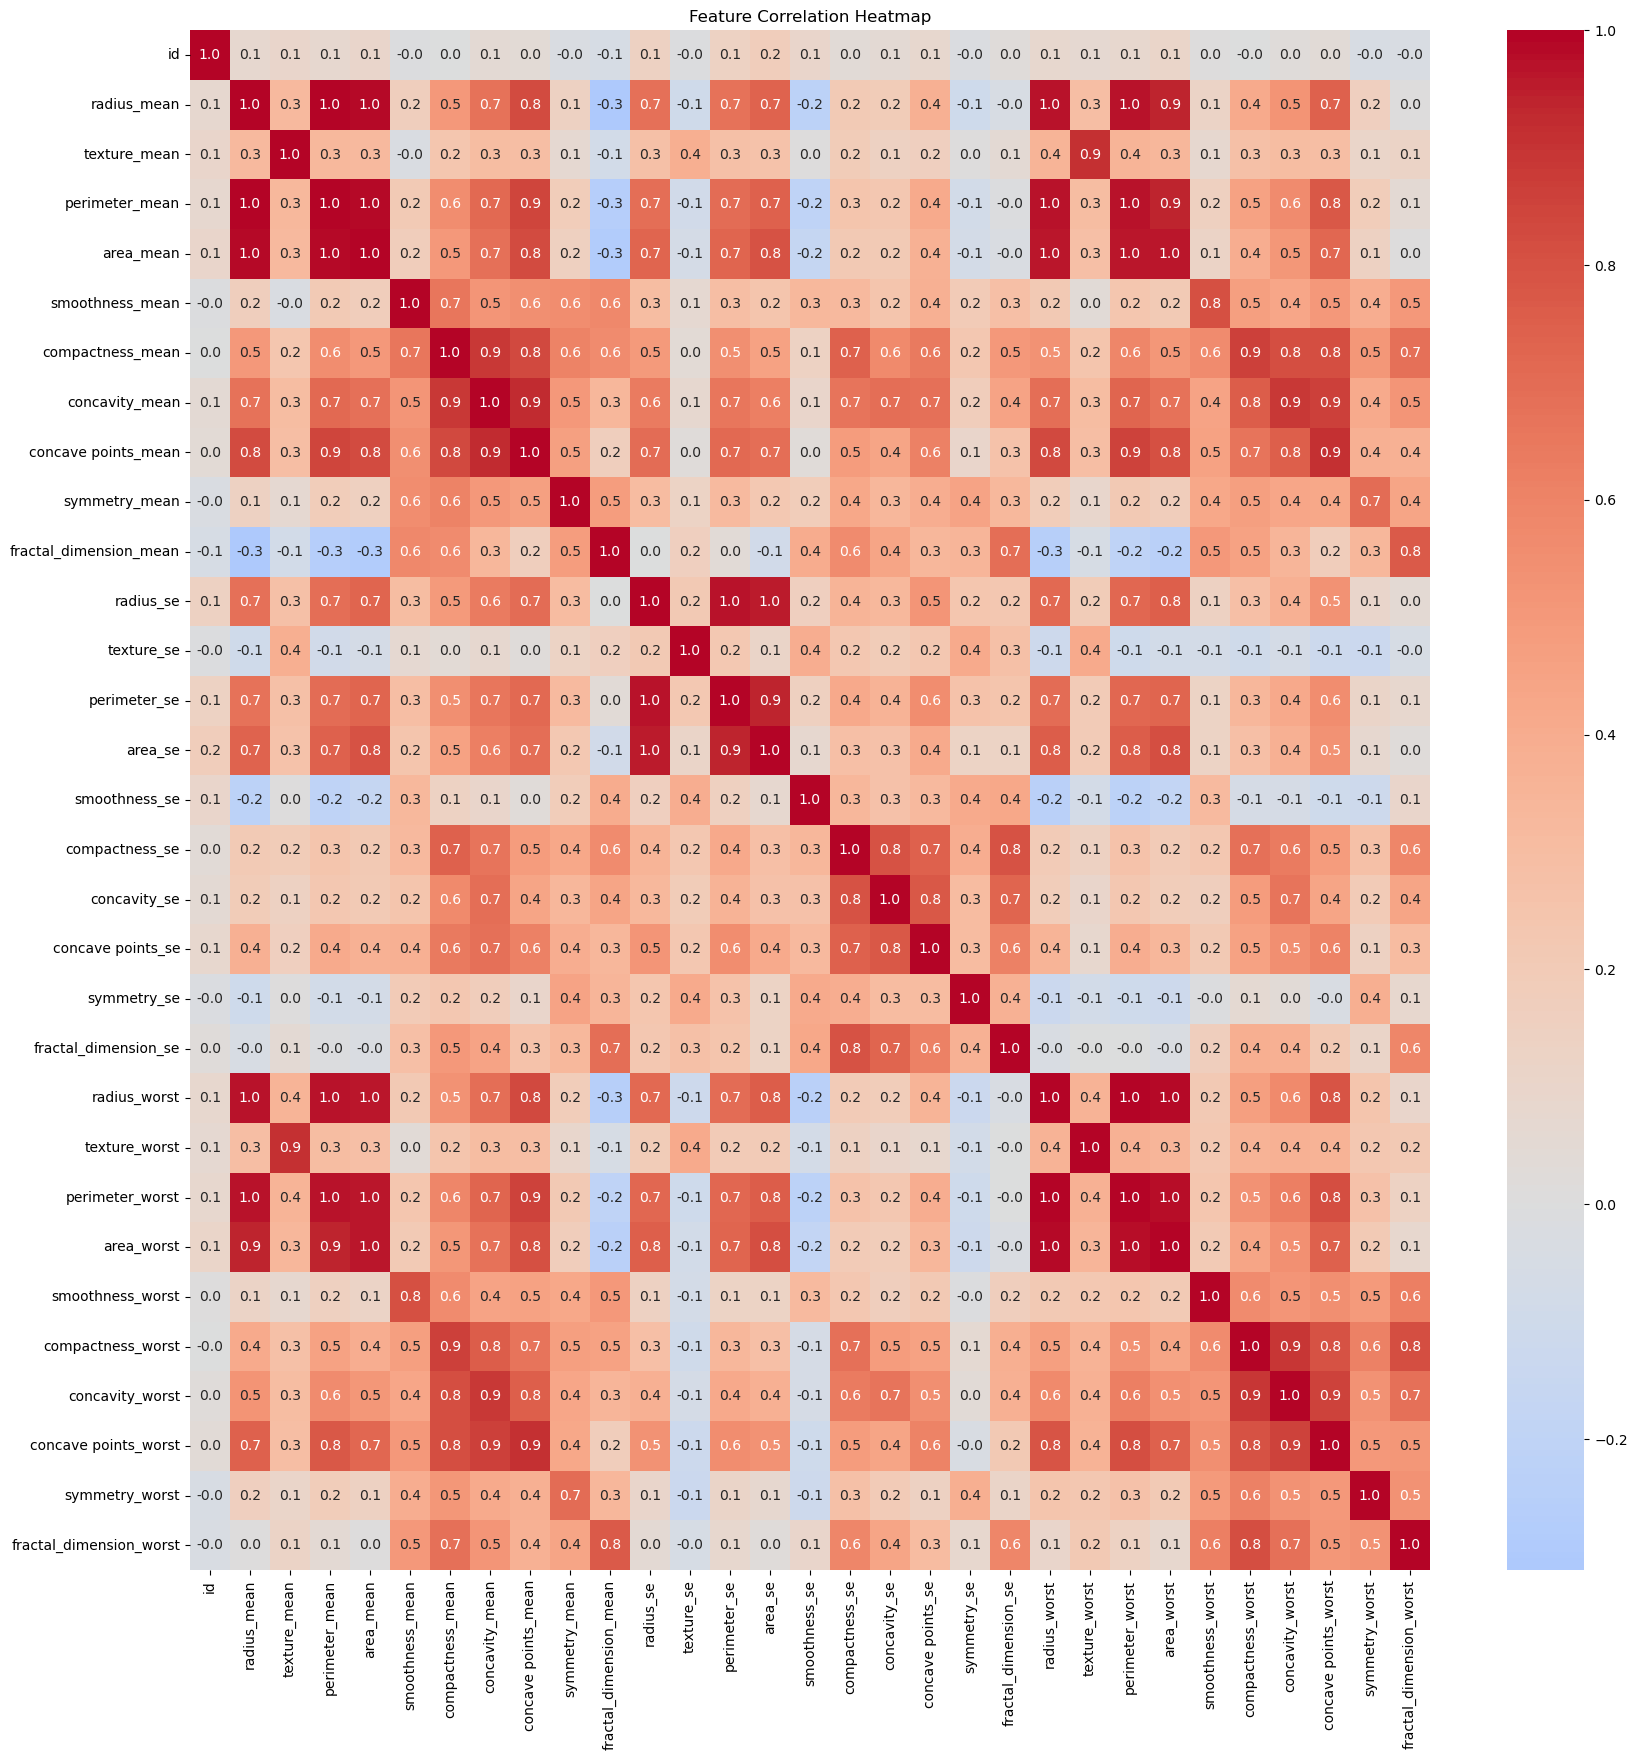

In [142]:
plt.figure(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, fmt='.1f')
plt.title("Feature Correlation Heatmap")
plt.show()


- radius / perimeter / area 계열 강한 상관

- mean / worst 간 중복성 높음

- 규제 모델(L1/L2) 또는 Tree 기반 모델 적합

### EDA 요약

- 클래스 분포는 약간 불균형

- feature 간 스케일 차이 큼 → scaling 필요

- radius / area / perimeter 계열은 높은 상관관계

- mean / worst feature 중복성 높음

## 모델링 & 평가

### 스케일링

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.transform(test_input)

### 로지스틱 회귀

In [144]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(train_scaled, train_target)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [145]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

lr_pred = lr.predict(test_scaled)
lr_proba = lr.predict_proba(test_scaled)[:, 1]

print("# Confusion Matrix")
print(confusion_matrix(test_target, lr_pred))
print()

print("# Classification Report")
print(classification_report(test_target, lr_pred))
print()

print("# ROC-AUC:", roc_auc_score(test_target, lr_proba))


# Confusion Matrix
[[71  1]
 [ 3 39]]

# Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


# ROC-AUC: 0.996031746031746


In [146]:
l1_model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    max_iter=1000
)

l1_model.fit(train_scaled, train_target)


,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [147]:
l1_pred = l1_model.predict(test_scaled)
l1_proba = l1_model.predict_proba(test_scaled)[:, 1]

print(confusion_matrix(test_target, l1_pred))
print(classification_report(test_target, l1_pred))
print("ROC-AUC:", roc_auc_score(test_target, l1_proba))


[[71  1]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC: 0.9966931216931217


In [148]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(train_input, train_target)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [149]:
rf_pred = rf_model.predict(test_input)
rf_proba = rf_model.predict_proba(test_input)[:, 1]

print(confusion_matrix(test_target, rf_pred))
print(classification_report(test_target, rf_pred))
print("ROC-AUC:", roc_auc_score(test_target, rf_proba))


[[72  0]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC: 0.9930555555555556


In [150]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(train_scaled, train_target)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [151]:
svm_pred = svm_model.predict(test_scaled)
svm_proba = svm_model.predict_proba(test_scaled)[:, 1]

print(confusion_matrix(test_target, svm_pred))
print(classification_report(test_target, svm_pred))
print("ROC-AUC:", roc_auc_score(test_target, svm_proba))


[[71  1]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC: 0.9947089947089948


In [152]:
results = pd.DataFrame({
    'Model': ['Logistic', 'Logistic (L1)', 'RandomForest', 'SVM'],
    'ROC_AUC': [
        roc_auc_score(test_target, lr_proba),
        roc_auc_score(test_target, l1_proba),
        roc_auc_score(test_target, rf_proba),
        roc_auc_score(test_target, svm_proba)
    ]
})

results


,Model,ROC_AUC
0,Logistic,0.996032
1,Logistic (L1),0.996693
2,RandomForest,0.993056
3,SVM,0.994709


In [ ]:
threshold = 0.3
adjusted_pred = (lr_proba >= threshold).astype(int)

print(confusion_matrix(test_target, adjusted_pred))
print(classification_report(test_target, adjusted_pred))


[[71  1]
 [ 1 41]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [154]:
coef_series = pd.Series(
    lr.coef_[0],
    index=train_input.columns
).sort_values(key=abs, ascending=False)

coef_series.head(10)


texture_worst          1.428289
radius_se              1.245725
symmetry_worst         1.050745
concave points_mean    0.966908
concavity_worst        0.914354
compactness_se        -0.912136
area_se                0.906928
area_worst             0.893980
radius_worst           0.892894
concavity_mean         0.782857
dtype: float64